<a href="https://colab.research.google.com/github/ancestor9/2025_Spring_Capstone-Design/blob/main/Week13/1_4_Generative_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Density Estimation**
<img src='https://images.unsplash.com/photo-1560091129-27a0e2af124b?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8ZGVuc2l0eXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=800&q=60' width=500 height=400>


### 밀도추정(density estimation)은 관측된 데이터 분포로부터 원래 변수의 확률 분포를 추정하고자 하는 것
- 1. outliers detection
- 2. non parametric classification
- 3. non parametric regression
- 4. cluster analysis / mode hunting

- **밀도 추정은 관찰된 데이터를 기반으로 관찰할 수 없는 기본 확률 밀도 함수의 추정을 구성하는 방법**
- **데이터 포인트를 데이터를 가장 잘 표현할 수 있는 곡선이나 함수에 매핑하는 것**


<img src='https://miro.medium.com/max/656/1*SlBPN0Fk9Ebq_4_dhJePZQ.gif' width=600>

https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html#sphx-glr-auto-examples-neighbors-plot-digits-kde-sampling-py

# **Generative Model with Kernel Density Estimation**
KDE을 사용하여 데이터 세트에 대한 생성 모델을 학습하여 **생성 모델(generative model)**을 완성하여 새로운 샘플을 그릴 수 있는 방법
- https://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html

**Step 1. 주성분으로 시각화(2차원)**

In [ ]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

plt.rcParams["figure.figsize"] = (10, 8)

# load the data
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


<ipython-input-11-a2c8d1781f97>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('magma', 10))


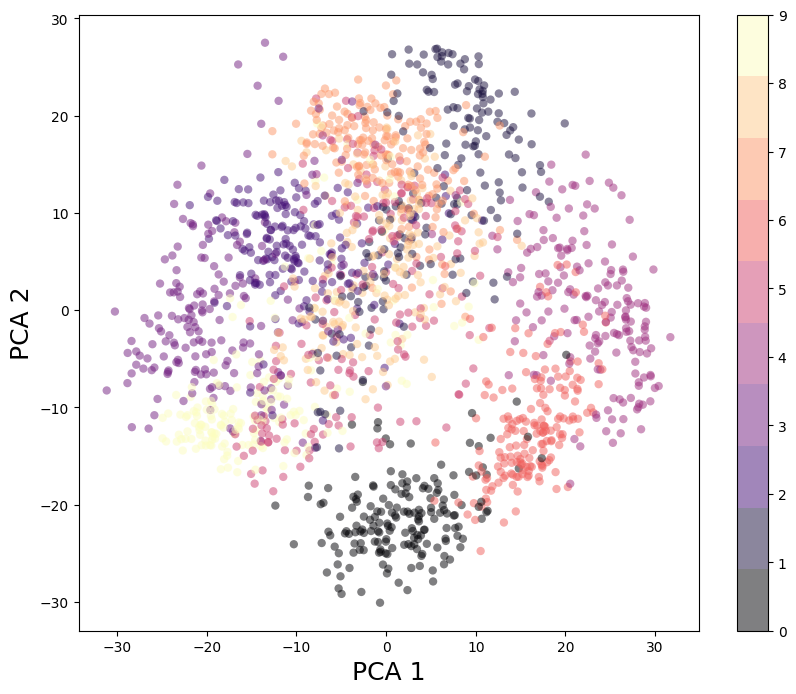

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib for plotting
import numpy as np # Import numpy

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('PCA 1', fontsize=18); plt.ylabel('PCA 2', fontsize=18)
plt.colorbar();

**Step 2. 주성분 15개로 차원 축소, 최적의 bandwidth 하이퍼파라미터 튜닝**

In [ ]:
# project the 64-dimensional data to a lower dimension
pca = PCA(n_components=15, whiten=False)
data = pca.fit_transform(digits.data)

# use grid search cross-validation to optimize the bandwidth
params = {"bandwidth": np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(data)
print('\n')
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))



best bandwidth: 3.79269019073225


**Step 3. 최적의 하이퍼파라미터 KDE를 객체화**
- sample 2개만 임의의 번호를 생성

In [ ]:
# use the best estimator to compute the kernel density estimate
kde = grid.best_estimator_
kde

KernelDensity(bandwidth=np.float64(3.79269019073225))

In [ ]:
# sample 2 new points from the data
kde.sample(2, random_state=0)

array([[ -8.25555185,  19.74759865, -21.09470411,  -5.7041774 ,
          1.55040113,  -1.09352638, -13.15826492,  -0.90515185,
         -3.19409013,   4.81740233,  -1.49116101,  -1.19663481,
          3.28208789,   8.62566682,   4.71688866],
       [-12.88631405,  -7.67181078,  10.3166078 , -17.08822477,
         -2.20867071,  -1.20258422,  -3.6556962 ,  -1.60552785,
         -5.75438434,   1.87585846,  -9.20762231,   2.73661563,
          9.87506429,  -1.46152405,   0.82485461]])

**Step 4. Sample 44개를 Generation 한다(Generative Model)**

In [ ]:
# sample 44 new points from the data
new_data = kde.sample(44, random_state=0)
new_data = pca.inverse_transform(new_data)
new_data.shape
print('\n')
# turn data into a 4x11 grid
new_data = new_data.reshape((4, 11, -1))
new_data.shape
real_data = digits.data[:44].reshape((4, 11, -1))
print('\n')
real_data.shape

(4, 11, 64)

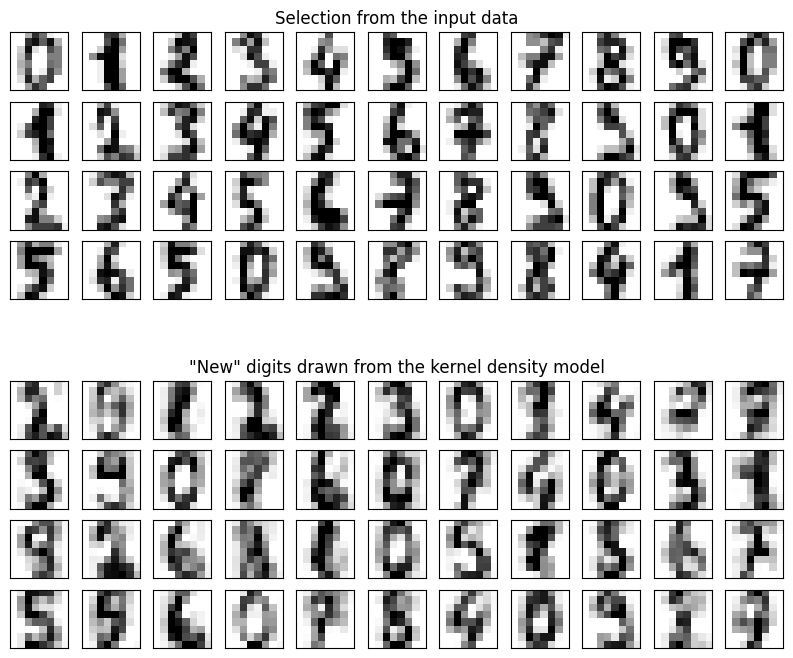

In [ ]:
# plot real digits and resampled digits
fig, ax = plt.subplots(9, 11, subplot_kw=dict(xticks=[], yticks=[]))
for j in range(11):
    ax[4, j].set_visible(False)
    for i in range(4):
        im = ax[i, j].imshow(
            real_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)
        im = ax[i + 5, j].imshow(
            new_data[i, j].reshape((8, 8)), cmap=plt.cm.binary, interpolation="nearest"
        )
        im.set_clim(0, 16)

ax[0, 5].set_title("Selection from the input data")
ax[5, 5].set_title('"New" digits drawn from the kernel density model')

plt.show()

## **7. Variational Auto Encoder - deep learning**
- Unsupervised learning
- 비선형데이터의 차원축소, 노이즈제거 이미지 복원, 새로운 이미지 생성 알고리즘
<img src='https://blog.kakaocdn.net/dn/qLLF6/btqMOy3Wp7C/Cyi04XYJTecOhJwGlJ71e0/img.png' width=800>

- https://kvfrans.com/variational-autoencoders-explained/

### **A. Autoencoder**

<img src='https://kvfrans.com/content/images/2016/08/autoenc.jpg' width=600>

###**B. Variational Autoencoder**

<img src='https://kvfrans.com/content/images/2016/08/vae.jpg' width=600>

###**C. Generative model using Variational Autoencoder**
<img src= 'https://miro.medium.com/max/1313/1*woWzbXU2bmshM1czEur72g.gif'>

### Scikit-learn implements efficient kernel density estimation
- kde using either a Ball Tree or KD Tree structure, through the KernelDensity estimator.
- The available kernels are shown as belows
- https://scikit-learn.org/stable/modules/density.html#kernel-density

# End